### 문제


In [1]:
! # 시작시간 체크

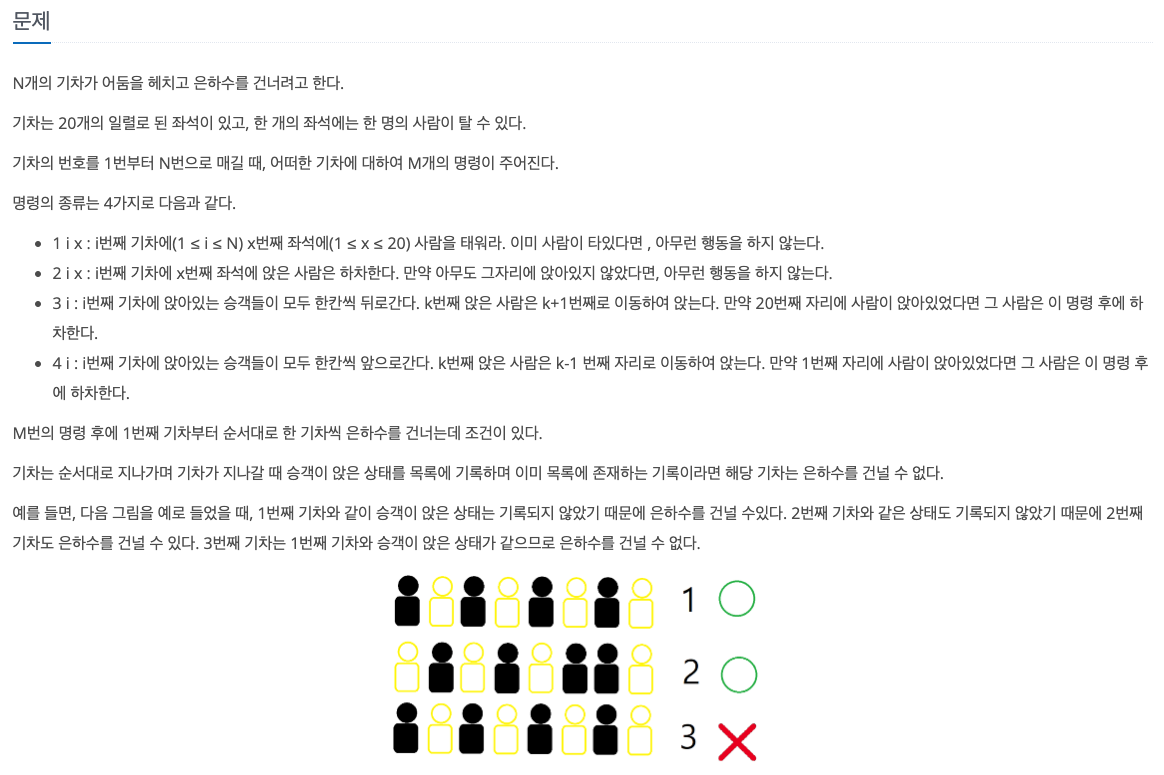

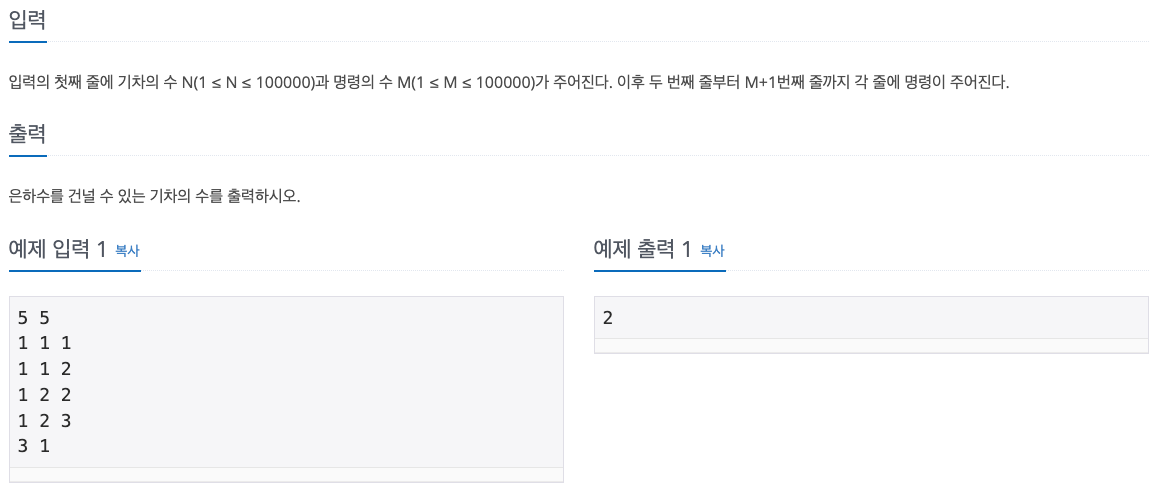

In [72]:
train

[deque([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 deque([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 deque([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 deque([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 deque([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 deque([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])]

상상코딩

    처음에 기차수 N과 명령의 수 M이 주어진다.
    두번 째 줄부터, M+1번째 줄까지 명령이 주어진다.
    은하수를 건널 수 있는 기차의 수를 출력.
    각 기차는 20개의 일렬로된 좌석이 있다. 리스트로 해보자
    주어진 명령을 구현해보자
    
    1 i x: i번째 기차 x 좌석을 1로
    2 i x: i번째 기차 x 좌석을 0으로
    3 i : i번째 기차 한칸씩 오른쪽으로 rotate (앞에 0추가)
    4 i : i번쨰 기차 한칸씩 왼쪽으로 rotate (뒤에 0추가)
    
    이걸 deque를 이용한 rotate로 구현해도 되지만 2진 연산으로 구현하는게 시간복잡도 면에선 탁월할 듯 싶다.
    
    길이가 20인 queue N개 생성

In [2]:
! # 끝 시간 체크

### 풀이

In [ ]:
import sys
from collections import deque
input=sys.stdin.readline
N,M=map(int,input().split())
train = [deque([0]*20) for _ in range(N+1)]

for _ in range(M):
    cmd=list(map(int,input().split()))
    if cmd[0]==1:
        i,x=cmd[1:]
        train[i][x-1]=1
    elif cmd[0]==2:
        i,x=cmd[1:]
        train[i][x-1]=0
    elif cmd[0]==3:
        i=cmd[1]
        train[i].rotate(1)
        train[i][0]=0        
    elif cmd[0]==4:
        i=cmd[1]
        train[i].rotate(-1)
        train[i][-1]=0
        
print(len(set([str(i) for i in train[1:]])))

### 비트연산 풀이

In [229]:
import sys
input = sys.stdin.readline
N,M=map(int,input().split())
train=[0]*N

for _ in range(M):
    c=list(map(int,input().split()))
    if c[0] == 1:
        i,x = c[1]-1,c[2]-1
        train[i] = train[i] | 1 << x
    elif c[0] == 2:
        i,x = c[1]-1,c[2]-1
        train[i] = train[i] & ~(1 << x)
    elif c[0] == 3:
        i = c[1]-1
        train[i] = (train[i] << 1) & ~(1 << 20)
    elif c[0] == 4:
        i = c[1]-1
        train[i] = train[i] >> 1

print(len(set(train)))

5 5


### 주석 달린 풀이

### 연습

In [215]:
N,M=5,5
c_li=[list(map(int,i.split())) for i in 
"""1 1 1
1 1 2
1 2 2
1 2 3
3 1""".split('\n')]

In [99]:
N,M=5,7
c_li=[list(map(int,i.split())) for i in 
"""1 1 1
1 1 2
1 2 2
1 2 3
3 1
4 1
4 1
4 1
3 2
3 2
3 2""".split('\n')]

#### 비트연산 연습

In [218]:
train=[0]*N

for op in c_li:
    if op[0] == 1:
        i, x = op[1]-1, op[2]-1
        train[i] = train[i] | 1 << x # or 연산으로 해당 지점에 1지정
    elif op[0] == 2:
        i, x = op[1]-1, op[2]-1
        train[i] = train[i] & ~(1 << x) # and 연산으로 해당 지점에 0지정
    elif op[0] == 3:
        i = op[1]-1
        train[i] = train[i] << 1
        train[i] = train[i] & ~(1 << 20)
    elif op[0] == 4:
        i = op[1]-1
        train[i] = train[i] >> 1
    print(op)
    print([bin(i)[2:] for i in train])
print(len(set(train)))

[1, 1, 1]
['1', '0', '0', '0', '0']
[1, 1, 2]
['11', '0', '0', '0', '0']
[1, 2, 2]
['11', '10', '0', '0', '0']
[1, 2, 3]
['11', '110', '0', '0', '0']
[3, 1]
['110', '110', '0', '0', '0']
2


In [221]:
bin(3)

'0b11'

In [222]:
bin(3<<1)

'0b110'

In [223]:
bin((3<<1) & ~(1<<20))

'0b110'

In [228]:
bin(1 << 3)

'0b1000'

In [228]:
bin(1 << 3)

'0b1000'

In [203]:
bin(1 << 20)

'0b100000000000000000000'

In [100]:
c_li

[[1, 1, 1],
 [1, 1, 2],
 [1, 2, 2],
 [1, 2, 3],
 [3, 1],
 [4, 1],
 [4, 1],
 [4, 1],
 [3, 2],
 [3, 2],
 [3, 2]]

In [101]:
train = [deque([0]*20) for _ in range(N+1)]

for cmd in c_li:
    if cmd[0]==1:
        i,x=cmd[1:]
        train[i][x-1]=1
    elif cmd[0]==2:
        i,x=cmd[1:]
        train[i][x-1]=0
    elif cmd[0]==3:
        i=cmd[1]
        train[i][-1]=0
        train[i].rotate(1)
    elif cmd[0]==4:
        i=cmd[1]
        train[i][0]=0
        train[i].rotate(-1)

print(len(set([str(i) for i in train[1:]])))

2


In [102]:
train

[deque([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 deque([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 deque([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 deque([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 deque([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 deque([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])]

In [83]:
for cmd in c_li:
    if cmd[0]==1:
        i,x=cmd[1:]
        train[i][x-1]=1
    elif cmd[0]==2:
        i,x=cmd[1:]
        train[i][x-1]=0
    elif cmd[0]==3:
        i=cmd[1]
        train[i][-1]=0
        train[i].rotate()
    elif cmd[0]==4:
        i=cmd[1]
        train[i][0]=0
        train[i].rotate(-1)
    print(f"{cmd} 이후")
    print(train)

[1, 1, 1] 이후
[deque([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), deque([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), deque([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), deque([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), deque([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), deque([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])]
[1, 1, 2] 이후
[deque([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), deque([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), deque([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), deque([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), deque([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), deque([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])]
[1, 2, 2] 이후
[deque([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), deque([1, 1, 0, 0, 0, 

In [67]:
train[1:]

[deque([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 deque([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 deque([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 deque([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 deque([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])]

In [57]:
print(len(set([str(i) for i in train])))

2


In [27]:
tt = train[0]
tt[2]=1
tt

deque([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [28]:
## 오른쪽으로 rotate
tt[-1]=0
tt.rotate()
tt

deque([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [29]:
## 왼쪽으로 rotate
tt[0]=0
tt.rotate(-1)
tt

deque([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])